<a href="https://colab.research.google.com/github/hurileborjigin/pytorch_notes/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General training pipeline in pytorch
1. Design model: input, output, size and forward pass
2. Construct loss and optimizer
3. Training loop

  - **forward pass**: compute predictino
  - **backward pass**: compute gradients
  - **update weights**

In [4]:
import torch
import torch.nn as nn

In [10]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

X = X.view(-1, 1)
y = y.view(-1, 1)


n_samples, n_features = X.shape
print(n_samples, n_features)
X



4 1


tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [20]:
# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# def forward(x):
#     return w * x

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size)


class LinearModel(nn.Module):
  def __init__(self, input_size, out_put_size):
    super().__init__()

    self.lin = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.lin(x)

model = LinearModel(input_size, output_size)
# params
lr = 0.01
iter_num = 1000

loss = torch.nn.MSELoss()

X_test = torch.tensor([5], dtype=torch.float32)


optimizer = torch.optim.SGD(model.parameters(), lr=lr)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


# Training loop
for epoch in range(iter_num):
  y_pred = model.forward(X)
  l = loss(y, y_pred)

  l.backward()

  # Update weights
  optimizer.step()

  # zero out the grads
  optimizer.zero_grad()

  if epoch % 100 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = -4.738
epoch 1: w = -0.413, loss = 67.70149231
epoch 101: w = 1.876, loss = 0.02246078
epoch 201: w = 1.908, loss = 0.01233070
epoch 301: w = 1.932, loss = 0.00676939
epoch 401: w = 1.949, loss = 0.00371631
epoch 501: w = 1.963, loss = 0.00204021
epoch 601: w = 1.972, loss = 0.00112005
epoch 701: w = 1.979, loss = 0.00061489
epoch 801: w = 1.985, loss = 0.00033757
epoch 901: w = 1.989, loss = 0.00018532
Prediction after training: f(5) = 9.983


## Linear Regression

In [21]:
# import requirements
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X_torch = torch.from_numpy(X_numpy.astype(np.float32))
y_torch = torch.from_numpy(y_numpy.astype(np.float32))
y_torch = y_torch.view(-1, 1)

n_samples, n_features = X_torch.shape
print(n_samples, n_features)


100 1


In [29]:
# 1) create a model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


In [30]:
# 2) loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [33]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass
  y_pred = model(X_torch)
  loss = criterion(y_pred, y_torch)
  # backward pass
  loss.backward()
  # update param
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 == 0:
    print(f'epoch:  {epoch + 1} \t loss: = {loss.item():.8f}')


epoch:  1 	 loss: = 551.49755859
epoch:  11 	 loss: = 492.32412720
epoch:  21 	 loss: = 449.18972778
epoch:  31 	 loss: = 417.73162842
epoch:  41 	 loss: = 394.77938843
epoch:  51 	 loss: = 378.02609253
epoch:  61 	 loss: = 365.79312134
epoch:  71 	 loss: = 356.85812378
epoch:  81 	 loss: = 350.32977295
epoch:  91 	 loss: = 345.55859375


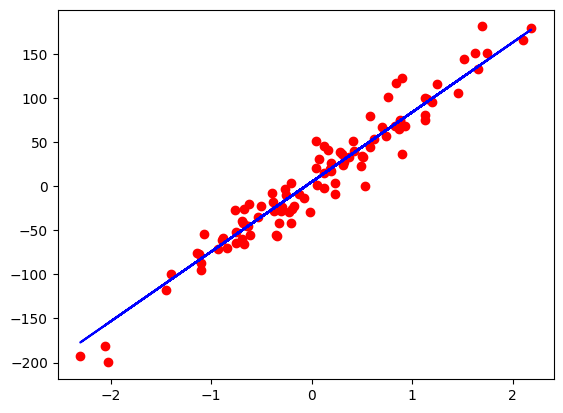

In [34]:
# plot
predicted = model(X_torch).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()